In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes/diabetes.csv


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [51]:
df = pd.read_csv('/kaggle/input/diabetes/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [53]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [54]:
zero_cols =['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[zero_cols].min()

Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
BMI              0.0
dtype: float64

In [55]:
df[zero_cols]=df[zero_cols].replace(0,np.nan)
mean = df[zero_cols].mean(skipna=True)
df[zero_cols]=df[zero_cols].replace(np.nan,mean)

In [56]:
df[zero_cols].min()

Glucose          44.0
BloodPressure    24.0
SkinThickness     7.0
Insulin          14.0
BMI              18.2
dtype: float64

In [57]:
x_train,y_train,x_test,y_test=train_test_split(df.iloc[:,0:8],df.iloc[:,8],test_size=0.2,random_state=123)

In [58]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
y_train=scaler.fit_transform(y_train)

In [59]:
import math
math.sqrt(len(y_test))

12.409673645990857

In [60]:
diab_knn = KNeighborsClassifier(n_neighbors=11)
diab_knn.fit(x_train,x_test)
diab_pred = diab_knn.predict(y_train)

In [61]:
knn_accuracy=accuracy_score(y_test,diab_pred)
knn_accuracy

0.8116883116883117

In [62]:
confusion_matrix(y_test,diab_pred)

array([[84, 12],
       [17, 41]])

In [63]:
knn_f1score=f1_score(y_test,diab_pred)
knn_f1score

0.7387387387387387

In [64]:
logistic=LogisticRegression()
logistic.fit(x_train,x_test)

LogisticRegression()

In [65]:
logistic_pred=logistic.predict(y_train)
pd.DataFrame(logistic_pred,y_test)

,0
Outcome,
1,1
0,0
0,1
0,0
0,0
...,...
0,0
1,1
0,0


In [66]:
logistic_accuracy=accuracy_score(y_test,logistic_pred)
logistic_accuracy

0.7857142857142857

In [67]:
confusion_matrix(y_test,logistic_pred)

array([[87,  9],
       [24, 34]])

In [70]:
logistic_f1score=f1_score(y_test,logistic_pred)
logistic_f1score

0.6732673267326732

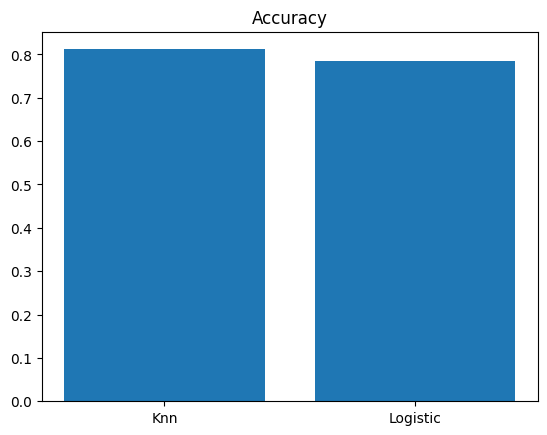

In [81]:
plt.bar(['Knn','Logistic'],[knn_accuracy,logistic_accuracy])
plt.title("Accuracy")
plt.show()

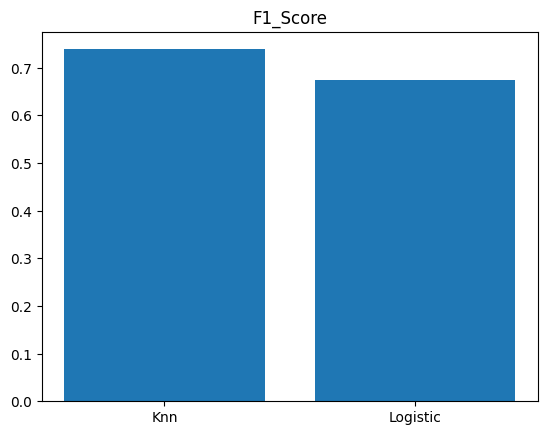

In [82]:
plt.bar(['Knn','Logistic'],[knn_f1score,logistic_f1score])
plt.title('F1_Score')
plt.show()

In [88]:
pd.DataFrame({'Actual':y_test,'Knn':diab_pred,'Logistic':logistic_pred})

,Actual,Knn,Logistic
236,1,1,1
395,0,0,0
36,0,1,1
210,0,0,0
483,0,0,0
...,...,...,...
650,0,0,0
579,1,1,1
119,0,0,0
593,0,0,0
